In [1]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import pandas as pd
tweets = pd.read_csv("Tweets.csv")
list(tweets.columns.values)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
sentiment_counts = tweets.airline_sentiment.value_counts()
number_of_tweets = tweets.tweet_id.count()
print(sentiment_counts)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [5]:
# preprocessing
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIVEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
normalizer("Here is text about an airline I like.")

['text', 'airline', 'like']

In [8]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
tweets['normalized_tweet'] = tweets.text.apply(normalizer)
tweets[['text','normalized_tweet']].head()

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_34540\1649148616.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells


,text,normalized_tweet
0,@VirginAmerica What @dhepburn said.,"[dhepburn, said]"
1,@VirginAmerica plus you've added commercials to the experience... tacky.,"[added, commercial, experience, tacky]"
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,"[today, must, mean, need, take, another, trip]"
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]"
4,@VirginAmerica and it's a really big bad thing about it,"[really, big, bad, thing]"


In [9]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
tweets['grams'] = tweets.normalized_tweet.apply(ngrams)
tweets[['grams']].head()

,grams
0,[dhepburn said]
1,"[added commercial, commercial experience, experience tacky, added commercial experience, commercial experience tacky]"
2,"[today must, must mean, mean need, need take, take another, another trip, today must mean, must mean need, mean need take, need take another, take another trip]"
3,"[really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse, really aggressive blast, aggressive blast obnoxious, blast obnoxious entertainment, obnoxious entertainment guest, entertainment guest face, guest face amp, face amp little, amp little recourse]"
4,"[really big, big bad, bad thing, really big bad, big bad thing]"


And now some counting.

In [10]:
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [11]:
tweets[(tweets.airline_sentiment == 'negative')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 449),
 ('customer service', 438),
 ('cancelled flightled', 425),
 ('late flight', 215),
 ('cancelled flighted', 196),
 ('flight cancelled', 185),
 ('late flightr', 144),
 ('cancelled flight', 131),
 ('hold hour', 128),
 ('flightled flight', 123),
 ('flight cancelled flightled', 117),
 ('flight delayed', 115),
 ('cancelled flightled flight', 107),
 ('call back', 106),
 ('booking problem', 98),
 ('gate agent', 83),
 ('flight flight', 74),
 ('hour late', 69),
 ('delayed flight', 69),
 ('flight attendant', 60)]

We can already tell there's a pattern here. Sentences like "cancelled flight", "late flight", "booking problems",  "delayed flight" stand out clearly. Lets check the positive tweets.

In [12]:
tweets[(tweets.airline_sentiment == 'positive')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 233),
 ('customer service', 91),
 ('flight attendant', 25),
 ('quick response', 19),
 ('great flight', 17),
 ('best airline', 16),
 ('great job', 16),
 ('great service', 16),
 ('gate agent', 16),
 ('booking problem', 15),
 ('thanks help', 15),
 ('thank much', 15),
 ('good work', 14),
 ('fleet fleek', 14),
 ('fleek http', 14),
 ('fleet fleek http', 14),
 ('fleek http co', 14),
 ('guy rock', 13),
 ('looking forward', 13),
 ('great customer', 12)]

## Preparing the data

In [13]:
import numpy as np
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [14]:
vectorized_data = count_vectorizer.fit_transform(tweets.text)
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [15]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = tweets.airline_sentiment.apply(sentiment2target)

To check performance of our classifier we want to split our data in to train and test.

In [16]:
from sklearn.model_selection import train_test_split
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [17]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(svm.SVC(gamma=0.01, C=100., probability=True, class_weight='balanced', kernel='linear'))
clf_output = clf.fit(data_train, targets_train)

## Evaluation of results

In [18]:
clf.score(data_test, targets_test)

0.7851775956284153

It's most likely possible to achieve a higher score with more tuning, or a more advanced approach. Lets check on how it does on a couple of sentences.

In [19]:
sentences = count_vectorizer.transform([
    "What a great airline, the trip was a pleasure!",
    "My issue was quickly resolved after calling customer support. Thanks!",
    "What the hell! My flight was cancelled again. This sucks!",
    "Service was awful. I'll never fly with you again.",
    "You fuckers lost my luggage. Never again!",
    "I have mixed feelings about airlines. I don't know what I think.",
    ""
])
clf.predict_proba(sentences)

array([[0.20642555, 0.06094141, 0.73263304],
       [0.13879912, 0.07354595, 0.78765493],
       [0.94149049, 0.04218929, 0.01632022],
       [0.889392  , 0.075302  , 0.035306  ],
       [0.9727441 , 0.01868917, 0.00856673],
       [0.47184681, 0.49845198, 0.02970121],
       [0.26660918, 0.52085149, 0.21253933]])

In [20]:
predictions_on_test_data = clf.predict_proba(data_test)
index = np.transpose(np.array([range(0,len(predictions_on_test_data))]))
indexed_predictions = np.concatenate((predictions_on_test_data, index), axis=1).tolist()

In [21]:
def marginal(p):
    top2 = p.argsort()[::-1]
    return abs(p[top2[0]]-p[top2[1]])
margin = sorted(list(map(lambda p : [marginal(np.array(p[0:3])),p[3]], indexed_predictions)), key=lambda p : p[0])
list(map(lambda p : tweets.iloc[data_test_index[int(p[1])].toarray()[0][0]].text, margin[0:10]))

['@JetBlue - Definitely no note from whoever stole from me.',
 '@AmericanAir I picked the nonstop flight bc I had things to get to. Should’ve taken diff route or airline I suppose!',
 '@JetBlue two rows',
 '@AmericanAir the pilot her and another flight attendant left walking away laughing.  Just wow',
 "@SouthwestAir unfortunately I don't even have that. My phone died before o had a chance to grab it. It was from OMA to SAN from 3/27-4/2",
 '@SouthwestAir could care more about their customer, if there is a reasonable request :(',
 '@united that would help! or how about integrate it into the App so I can just "activate" it and surf...',
 '@JetBlue A320 pulling into the gate as the sunrises here at @BostonLogan this morning #jetbluesofly #jetblue #airbus http://t.co/JGdu5us8Dz',
 '@USAirways thanks. We did see an agent. Unhelpful. Some got vouchers others did not for unexplained reasons.',
 '@united sister &amp; BIL stuck in Detroit desperately need to be in Florida flying w/ @USAirways 

and their probability distributions?

In [22]:
list(map(lambda p : predictions_on_test_data[int(p[1])], margin[0:10]))

[array([0.46864034, 0.06271932, 0.46864034]),
 array([0.45364795, 0.45359358, 0.09275847]),
 array([0.36124007, 0.36102246, 0.27773746]),
 array([0.40387303, 0.19251456, 0.40361242]),
 array([0.4958566 , 0.49547657, 0.00866683]),
 array([0.47851028, 0.47808838, 0.04340134]),
 array([0.48336166, 0.48417747, 0.03246087]),
 array([0.40092681, 0.19732223, 0.40175095]),
 array([0.49526874, 0.01051207, 0.49421919]),
 array([0.49831101, 0.4996682 , 0.0020208 ])]

How about the easiest sentences?

In [23]:
list(map(lambda p : tweets.iloc[data_test_index[int(p[1])].toarray()[0][0]].text, margin[-10:]))

['@united here we go again. 2 of 3 segments SFO--New York RT were delayed OVER 2 hrs each! Why do you suck so BAD!?!Maybe another line of bus?',
 '@united is the worst airline. Lost my luggage delayed my flights and has been very unaccomidating',
 '@USAirways Been stuck for 40+ minutes due to lavatory issues. No beverages. No snacks. No customer service. Flt 645 to PHO... #fail #refund',
 '@AmericanAir Worst airline ever. We have been stranded for 24 hours because of your 7 hour delay with flight 104 last night.',
 "@USAirways seriously???  did you not see that I've spent 2 days - for multiple hours on hold just to have to hang up after the hours?",
 '@USAirways waited for 3 hours NO LUGGAGE line too long left airport when flight Cancelled Flighted WHERE does luggage GO? On hold for 1 hour so far',
 '@AmericanAir AA 1657 was also over an hour Late Flight to depart Ohare and now we have no luggage. Not happy standing in a long line at baggage svc',
 '@USAirways Customer service is dead.

and their probability distributions?

In [24]:
list(map(lambda p : predictions_on_test_data[int(p[1])], margin[-10:]))

[array([9.97087413e-01, 1.99218459e-03, 9.20401966e-04]),
 array([9.97782072e-01, 1.70028116e-03, 5.17646551e-04]),
 array([9.97709507e-01, 1.55540547e-03, 7.35087336e-04]),
 array([9.98518442e-01, 1.30883465e-03, 1.72723787e-04]),
 array([9.98577848e-01, 1.36347286e-03, 5.86790850e-05]),
 array([9.98841285e-01, 1.08154455e-03, 7.71701777e-05]),
 array([9.98626197e-01, 8.54777627e-04, 5.19025055e-04]),
 array([9.98955424e-01, 7.08805049e-04, 3.35770758e-04]),
 array([9.99192247e-01, 2.51894365e-04, 5.55858277e-04]),
 array([9.99399760e-01, 4.28489663e-04, 1.71750365e-04])]

Looks like all of the easiest sentences are negative. What is the distribution of certainty across all sentences?

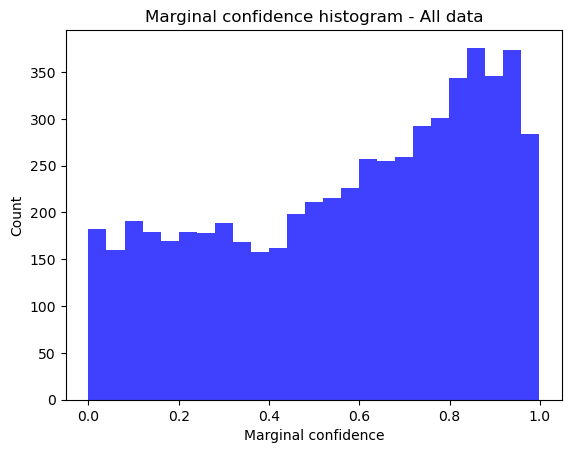

In [25]:
import matplotlib.pyplot as plt
marginal_probs = list(map(lambda p : p[0], margin))
n, bins, patches = plt.hist(marginal_probs, 25, facecolor='blue', alpha=0.75)
plt.title('Marginal confidence histogram - All data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_34540\966674214.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  positive_test_data = list(filter(lambda row : row[0]==2, hstack((targets_test[:,None], data_test)).toarray()))


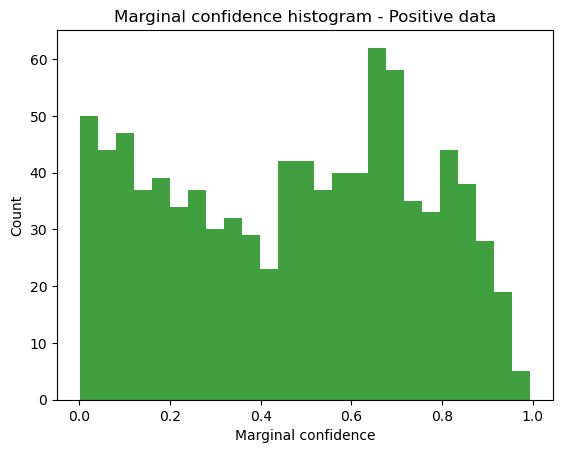

In [26]:
positive_test_data = list(filter(lambda row : row[0]==2, hstack((targets_test[:,None], data_test)).toarray()))
positive_probs = clf.predict_proba(list(map(lambda r : r[1:], positive_test_data)))
marginal_positive_probs = list(map(lambda p : marginal(p), positive_probs))
n, bins, patches = plt.hist(marginal_positive_probs, 25, facecolor='green', alpha=0.75)
plt.title('Marginal confidence histogram - Positive data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

### Neutral data

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_34540\1956868238.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  positive_test_data = list(filter(lambda row : row[0]==1, hstack((targets_test[:,None], data_test)).toarray()))


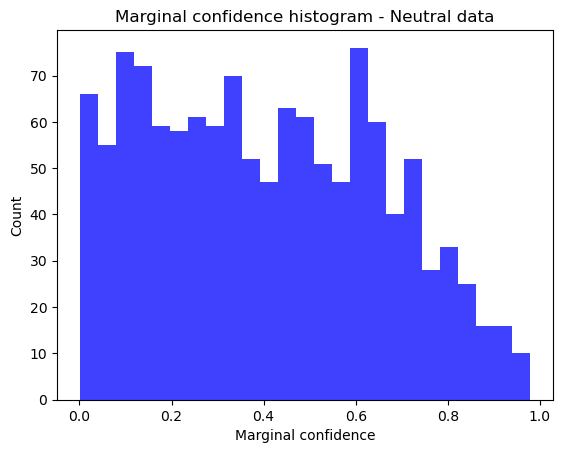

In [27]:
positive_test_data = list(filter(lambda row : row[0]==1, hstack((targets_test[:,None], data_test)).toarray()))
positive_probs = clf.predict_proba(list(map(lambda r : r[1:], positive_test_data)))
marginal_positive_probs = list(map(lambda p : marginal(p), positive_probs))
n, bins, patches = plt.hist(marginal_positive_probs, 25, facecolor='blue', alpha=0.75)
plt.title('Marginal confidence histogram - Neutral data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

### Negative data

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_34540\2889540462.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  negative_test_data = list(filter(lambda row : row[0]==0, hstack((targets_test[:,None], data_test)).toarray()))


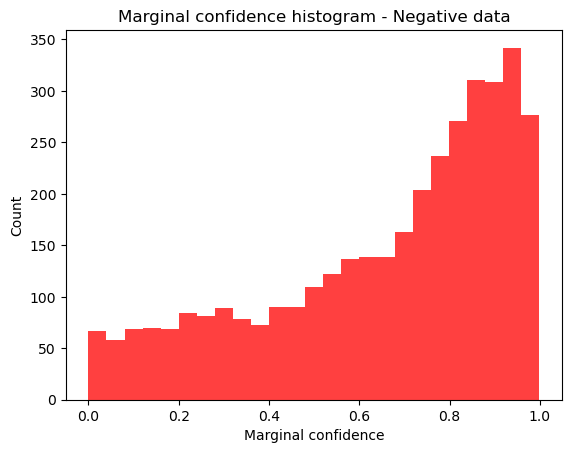

In [28]:
negative_test_data = list(filter(lambda row : row[0]==0, hstack((targets_test[:,None], data_test)).toarray()))
negative_probs = clf.predict_proba(list(map(lambda r : r[1:], negative_test_data)))
marginal_negative_probs = list(map(lambda p : marginal(p), negative_probs))
n, bins, patches = plt.hist(marginal_negative_probs, 25, facecolor='red', alpha=0.75)
plt.title('Marginal confidence histogram - Negative data')
plt.ylabel('Count')
plt.xlabel('Marginal confidence')
plt.show()

Clearly the positive data is much harder for the classifier. This makes sense since there's a lot less of it. An important challenge in building a better classifier will then be how to handle positive data.

A more advanced classifier is described here.